# Introduction to Machine Learning
Definition: Machine Learning (ML) is a subset of artificial intelligence that provides systems the ability to automatically learn and improve from experience without being explicitly programmed. It focuses on the development of algorithms that can analyze data, recognize patterns, and make decisions with minimal human intervention.

# Machine Learning Modelling Flow
Definition: The process of developing a machine learning model involves several steps, typically including:

- **Data Collection**: Gathering data from various sources.
<br>

- **Data Preparation**: Cleaning and transforming the data.
<br>
- **Feature Engineering**: Creating new features from raw data.
<br>
- **Model Selection**: Choosing the appropriate algorithm.
<br>
- **Training**: Training the model using training data.
<br>
- **Evaluation**: Evaluating the model's performance on test data.
<br>
- **Tuning**: Optimizing the model's hyperparameters.
<br>
- **Prediction**: Using the model to make predictions on new data.

# Parametric and Non-parametric Algorithms

### Parametric Algorithms:
These algorithms make strong assumptions about the data's underlying distribution. They have a fixed number of parameters.


### Non-parametric Algorithms: 
These algorithms make fewer assumptions about the data and can adapt to the complexity of the data better as they have a flexible number of parameters.

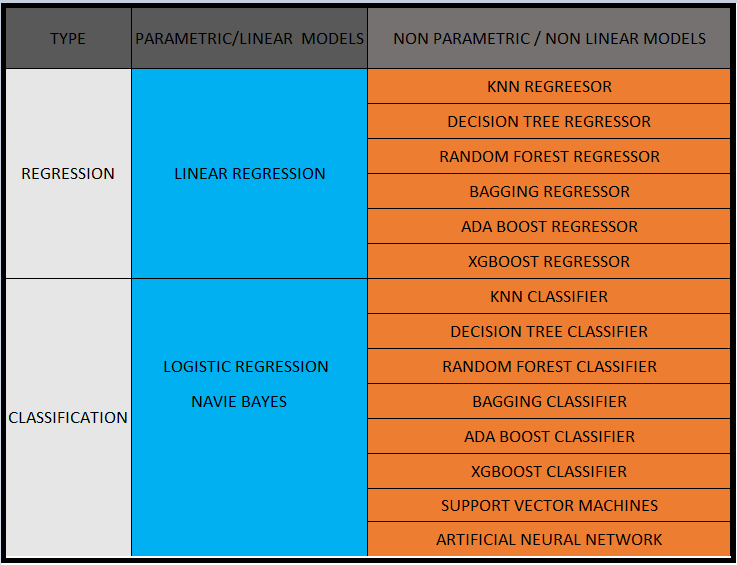

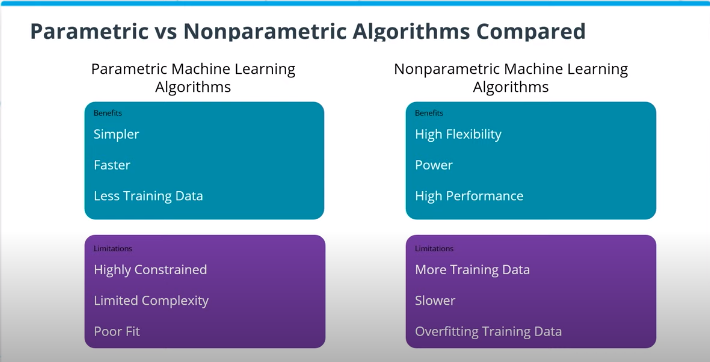

# Types of Machine Learning

#### Supervised Learning: 
The model is trained on labeled data.
#### Unsupervised Learning: 
The model is trained on unlabeled data.
#### Reinforcement Learning: 
The model learns by interacting with an environment and receiving feedback.
<br>
Reinforcement Learning is more complex and typically involves specialized libraries

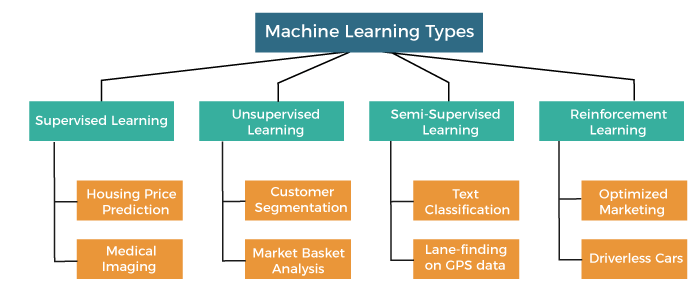

# Performance Measures
Definition: Metrics used to evaluate the performance of machine learning models.

In [2]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming y_test and y_pred are defined
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}")


# Bias-Variance Tradeoff
Definition: The balance between bias (error due to overly simplistic models) and variance (error due to overly complex models). Ideally, we want to find a model that has low bias and low variance.

### High Bias: 
The model makes strong assumptions about the data, leading to high error on both training and test sets.
### High Variance: 
The model is highly flexible, capturing noise in the training data, leading to low error on the training set but high error on the test set.

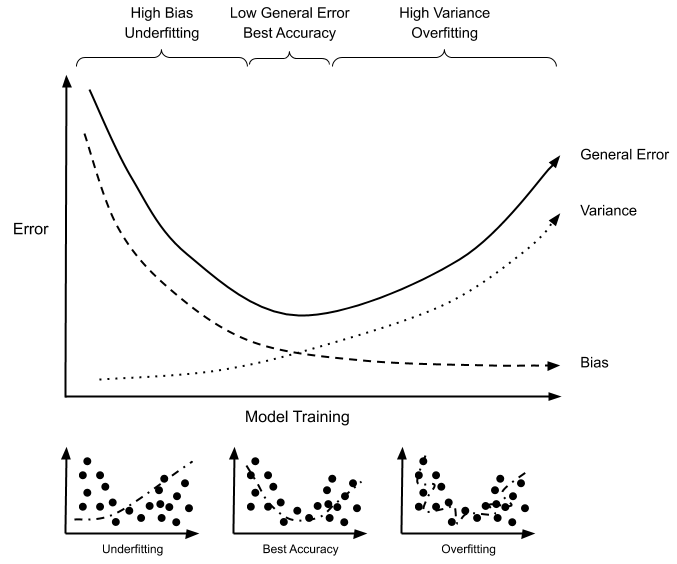

# Data Inconsistencies
Definition: Inconsistencies in data, such as missing values, duplicates, or incorrect formatting, which can adversely affect the performance of machine learning models.

In [4]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Create a DataFrame with missing values
data = {'A': [1, 2, None, 4],
        'B': [4, None, 6, 8]
       }

df = pd.DataFrame(data)

df

,A,B
0,1.0,4.0
1,2.0,NaN
2,NaN,6.0
3,4.0,8.0


In [5]:
df.isna().sum()

A    1
B    1
dtype: int64

In [7]:
# Handling missing values
imputer = SimpleImputer(strategy='mean')
data = imputer.fit_transform(df)


df_imputed = pd.DataFrame(data, columns=df.columns)

df_imputed

,A,B
0,1.000000,4.0
1,2.000000,6.0
2,2.333333,6.0
3,4.000000,8.0


In [9]:
data = {'City':['Noida','Delhi','Greater Noida','Delhi','Noida'],
       
       'Sales':[12,23,34,32,21]}

df = pd.DataFrame(data)
df

,City,Sales
0,Noida,12
1,Delhi,23
2,Greater Noida,34
3,Delhi,32
4,Noida,21


In [13]:
pd.get_dummies(df,dtype=int,drop_first=True)

,Sales,City_Greater Noida,City_Noida
0,12,0,1
1,23,0,0
2,34,1,0
3,32,0,0
4,21,0,1


In [16]:
final_df = pd.get_dummies(df,dtype=int)
final_df.drop('City_Greater Noida',axis = 1,inplace=True)

final_df

,Sales,City_Delhi,City_Noida
0,12,0,1
1,23,1,0
2,34,0,0
3,32,1,0
4,21,0,1


In [22]:
final_df.rename(columns = {'City_Delhi':'Delhi',
                           'City_Noida':'Noida'})

,Sales,Delhi,Noida
0,12,0,1
1,23,1,0
2,34,0,0
3,32,1,0
4,21,0,1


In [31]:
data = {'City':['Noida','Delhi','Greater Noida','Delhi','Noida'],
       
       'Sales':[12,23,34,32,21]}

df = pd.DataFrame(data)
df

,City,Sales
0,Noida,12
1,Delhi,23
2,Greater Noida,34
3,Delhi,32
4,Noida,21


In [23]:
from sklearn.preprocessing import LabelEncoder

In [32]:

le = LabelEncoder()
ans = le.fit_transform(df[['City']])
ans

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([2, 0, 1, 0, 2])

In [33]:
df['City'] = ans

df

,City,Sales
0,2,12
1,0,23
2,1,34
3,0,32
4,2,21


In [45]:
data = {'City':['Noida','Delhi','Greater Noida','Delhi','Noida'],
       
       'Sales':[12,23,34,32,21]}

df = pd.DataFrame(data)
df

,City,Sales
0,Noida,12
1,Delhi,23
2,Greater Noida,34
3,Delhi,32
4,Noida,21


In [46]:
c = df['City'].unique()

idx = range(0,len(c))

ans = dict(zip(c,idx))


ans

{'Noida': 0, 'Delhi': 1, 'Greater Noida': 2}

In [48]:
 df['City']  =  df['City'].map(ans)

In [49]:
df

,City,Sales
0,0,12
1,1,23
2,2,34
3,1,32
4,0,21


# Optimization Techniques
Definition: Optimization techniques in machine learning are algorithms used to minimize or maximize a loss function by iteratively adjusting the model's parameters. These techniques are crucial for training machine learning models as they help find the best parameters that lead to the most accurate predictions.

# Gradient Descent
Definition: Gradient Descent is an optimization algorithm used to minimize the loss function by iteratively moving towards the steepest descent, defined by the negative gradient. It is widely used in training machine learning models, especially neural networks.

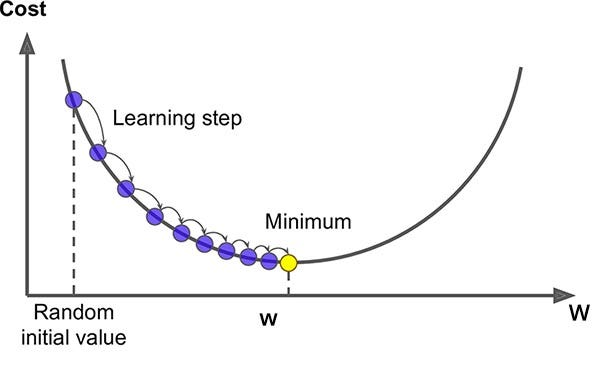

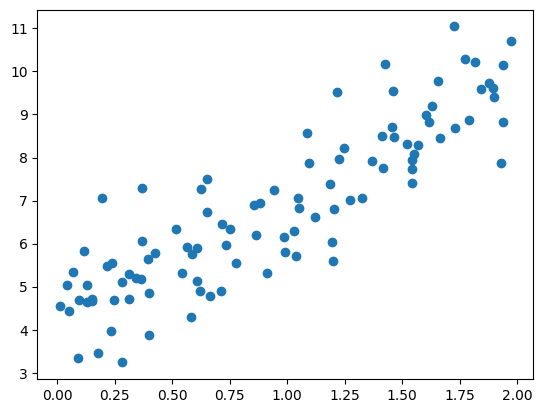

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)


plt.scatter(X, y)
plt.show()


array([[-0.84679372],
       [-1.51484722]])

100

In [76]:
# Add a column of ones to X to include the intercept term (bias)
X_b = np.c_[np.ones((100, 1)), X]
# X_b


# Gradient Descent Implementation

theta = np.random.randn(2, 1)
theta

# Hyperparameters
learning_rate = 0.1
n_iterations = 1000
m = len(X_b)
m

# Initialize parameters
theta = np.random.randn(2, 1)  # Random initialization



# Gradient Descent
for iteration in range(n_iterations):
    
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - learning_rate * gradients


# Plot the resulting line
    plt.scatter(X, y)

    plt.plot(X, X_b.dot(theta), color='red')

    plt.show()

    display(clear = True)

print(f"Estimated parameters: {theta.ravel()}")

Estimated parameters: [4.21509616 2.77011339]


# Adagrad Algorithm
Definition: Adagrad (Adaptive Gradient Algorithm) is an optimization algorithm that adapts the learning rate to the parameters, performing smaller updates for parameters associated with frequently occurring features and larger updates for infrequent features. It accumulates squared gradients to adjust the learning rate dynamically.

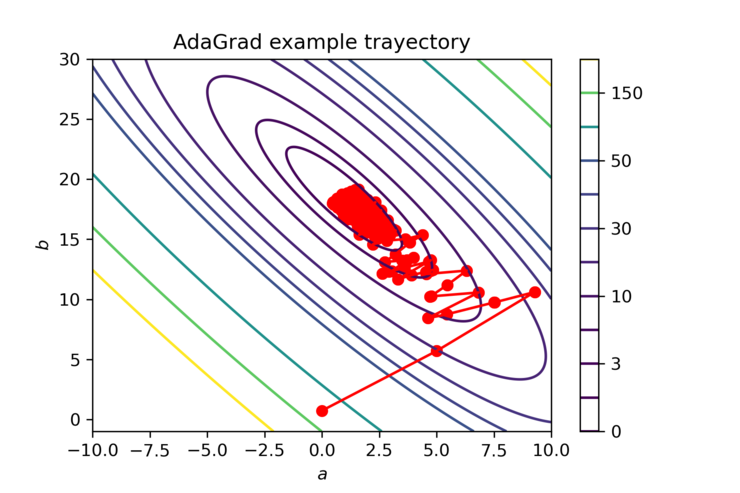

# Adam Algorithm
Definition: Adam (Adaptive Moment Estimation) is an optimization algorithm that combines the advantages of two other extensions of gradient descent: Adagrad and RMSProp. It computes adaptive learning rates for each parameter by using estimates of first and second moments of the gradients.

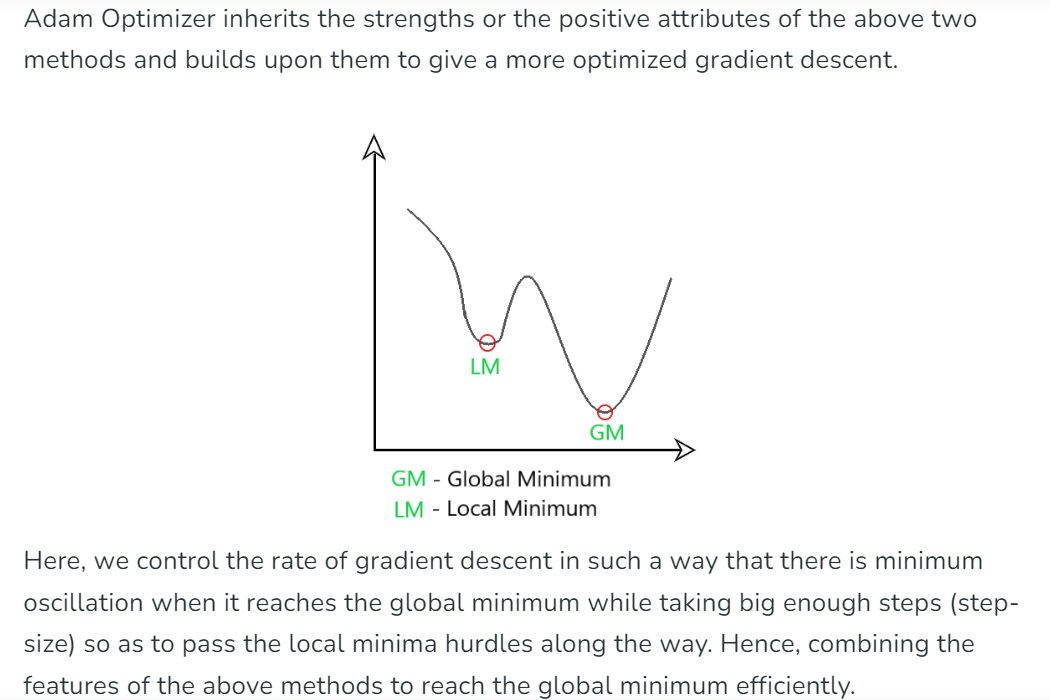

In [53]:
# Optimization example using sklearn's LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate synthetic data
X, y = make_regression(n_samples=1000, n_features=1, noise=20)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 368.1317206291935


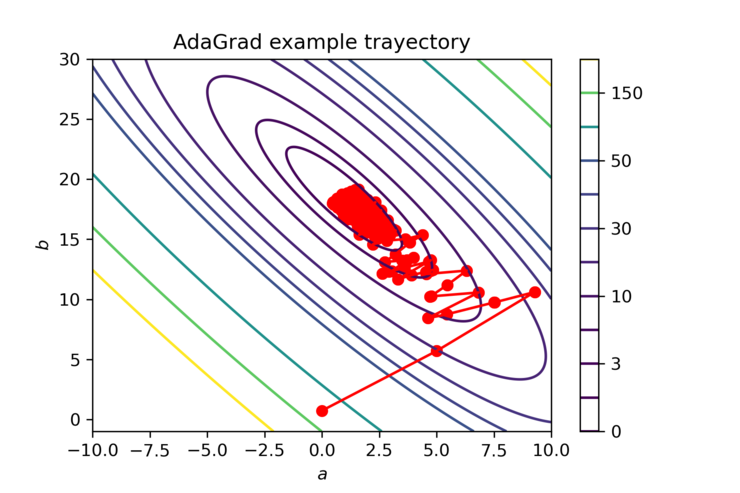

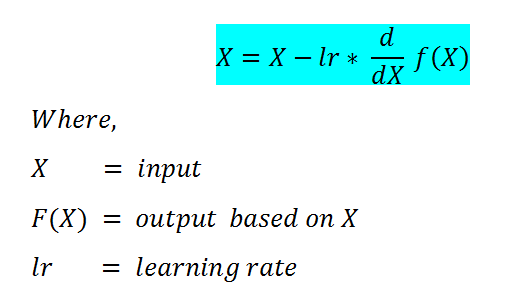

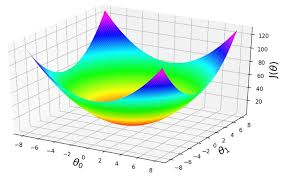